In [65]:
import numpy as np
import matplotlib.pyplot as plt

import scienceplots
plt.style.use('science')
plt.style.use(['no-latex'])

savepath = "results/P2Q1/"

$x=s+\epsilon$, $\epsilon \sim \mathcal{N}(0,\sigma^2)$ 

If $L_2$ prior ($s \sim \mathcal{N}(0,1)$), then MAP as quadratic minimization. 
\begin{equation}
    p(x|s) = \dfrac{1}{\sqrt{2\pi\sigma^2}}\exp\left( -\dfrac{(x-s)^2}{2\sigma^2} \right), p(s) = \dfrac{1}{\sqrt{2\pi}}\exp\left ( -\dfrac{s^2}{2} \right ). 
\end{equation}
The posterior (up to a constant in $s$) is: 
\begin{equation}
    \log p(s|x) = \log p(x|s) + \log p(s) + C = -\dfrac{(x-s)^2}{2\sigma^2} - \dfrac{s^2}{2} + C. 
\end{equation}

Differentiate and set to zero: 
\begin{equation}
\dfrac{\partial}{\partial s} \left ( \dfrac{(s-x)^2}{2\sigma^2} + \dfrac{s^2}{2} \right ) = \dfrac{s-x}{\sigma^2} + s = 0, \hat{s}(x,\sigma^2) = \dfrac{x}{1+\sigma^2}. 
\end{equation}

The Hessian $1/\sigma^2+1 > 0$ ensures a unique minimizer, so $L_2$ regularization yields linear shrinkage toward $0$. 

We now minimize: 
\begin{equation}
    \min_s \dfrac{(s-x)^2}{2\sigma^2} + \sqrt{2}|s|. 
\end{equation}
Take the Laplace prior: 
\begin{equation}
    p(s) = \dfrac{1}{\sqrt{2}}\exp(-\sqrt{2}|s|). 
\end{equation}
Then: 
\begin{equation}
    -\log p(s|x) = \dfrac{(s-x)^2}{2\sigma^2} + \sqrt{2}|s| + C, 
\end{equation}
so the MAP estimator gives exactly the stated problem. 

Let: 
\begin{equation}
    f(s) = \dfrac{(s-x)^2}{2\sigma^2} + \sqrt{2}|s|. 
\end{equation}
The subgradient is: 
\begin{equation}
    \partial f(s) = \dfrac{s-x}{\sigma^2} + \sqrt{2}\partial |s|, \partial|s|= \begin{cases}\{1\}, & s>0 \\ {[-1,1],} & s=0 \\ \{-1\}, & s<0\end{cases}. 
\end{equation}
Optimality $0 \in \partial f(\hat{s})$ gives three cases: 
1. $s>0: (s-x)/\sigma^2 + \sqrt{2} = 0, s = x - \sqrt{2}\sigma^2 > 0$, which requires $x > \sqrt{2}\sigma^2$. 

2. $s<0: (s-x)/\sigma^2 - \sqrt{2} = 0, s = x + \sqrt{2}\sigma^2 < 0$, which requires $x < -\sqrt{2}\sigma^2$. 

3: $s=0$: need $0 \in (-x/\sigma^2) + \sqrt{2}[-1,1]$, $|x| \le \sqrt{2}\sigma^2$. 

Combining: 
\begin{equation}
    \hat{s}\left(x, \sigma^2\right)=\operatorname{sgn}(x)\left(|x|-\sqrt{2} \sigma^2\right)_{+}=\operatorname{sgn}(x)\left(|x|-\frac{2 \sigma^2}{\sqrt{2}}\right)_{+}, 
\end{equation}
which is a soft-thresholded rule with threshold $\tau = \sqrt{2}\sigma^2$. The graph is piece-wise linear with slope $1$ outside $[-\tau, \tau]$ and flat $0$ inside. 

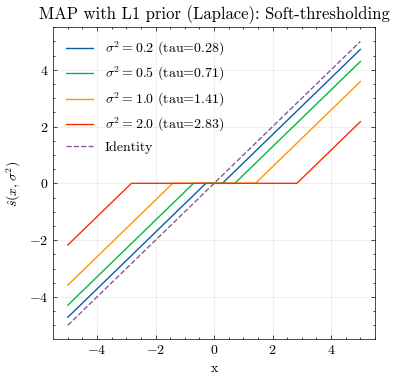

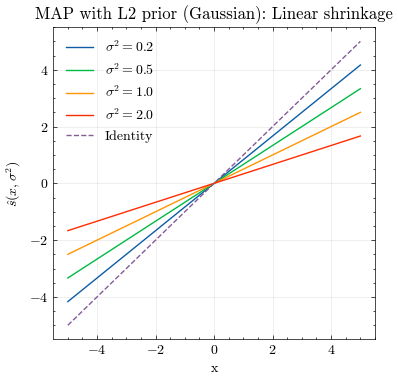

In [67]:
def l1_map_estimator(x, sigma2):
    """"""
    tau = np.sqrt(2.0) * sigma2
    return np.sign(x) * np.maximum(np.abs(x) - tau, 0.0)

def l2_map_estimator(x, sigma2):
    """"""
    return x / (1.0 + sigma2)

x = np.linspace(-5, 5, 1000)
sigma2_list = [0.2, 0.5, 1.0, 2.0]

fig1, ax1 = plt.subplots(1,1,figsize=(4,4))
for s2 in sigma2_list:
    y = l1_map_estimator(x, s2)
    ax1.plot(x, y, label=fr"$\sigma^2={s2}$ (tau={np.sqrt(2)*s2:.2f})")
ax1.plot(x, x, linestyle="--", label="Identity")
ax1.set_title("MAP with L1 prior (Laplace): Soft-thresholding")
ax1.set_xlabel("x")
ax1.set_ylabel(r"$\hat{s}(x,\sigma^2)$")
ax1.legend()
ax1.grid(True, alpha=0.3)
fig1.tight_layout()
fig1.savefig(f"{savepath}l1_soft_threshold.png", dpi=1000)

fig2, ax2 = plt.subplots(1,1,figsize=(4,4))
for s2 in sigma2_list:
    y = l2_map_estimator(x, s2)
    ax2.plot(x, y, label=fr"$\sigma^2={s2}$")
ax2.plot(x, x, linestyle="--", label="Identity")
ax2.set_title("MAP with L2 prior (Gaussian): Linear shrinkage")
ax2.set_xlabel("x")
ax2.set_ylabel(r"$\hat{s}(x,\sigma^2)$")
ax2.legend()
ax2.grid(True, alpha=0.3)
fig2.tight_layout()
fig2.savefig(f"{savepath}l2_linear_shrinkage.png", dpi=1000)